# Load the Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/titanic/train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [4]:
#Описание набора данных
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
#Кол-во отсутствующих значений по столбцам
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Analytics

### ***У женщин значительно более высокий уровень выживаемости по сравнению с мужчинами***

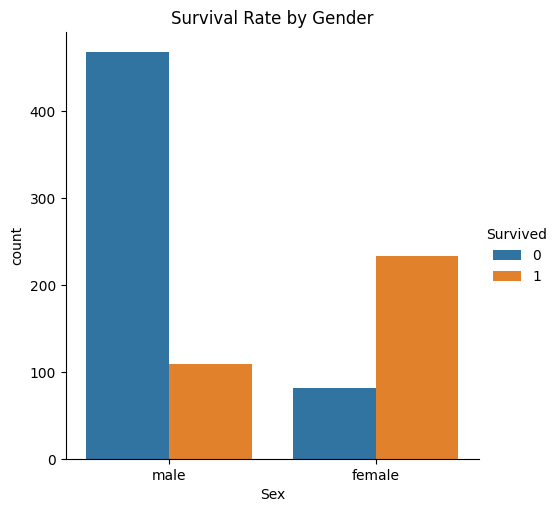

In [7]:
sns.catplot(x="Sex", hue="Survived", kind="count", data=df)
plt.title("Survival Rate by Gender")
plt.show()

### ***Пассажиры классов 1 и 2 имели более высокие показатели выживаемости по сравнению с пассажирами более низких классов***

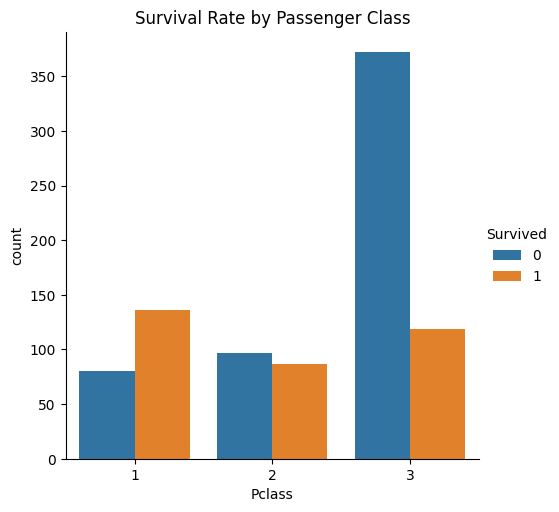

In [8]:
sns.catplot(x="Pclass", hue="Survived", kind="count", data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()

### ***Пассажиры, высадившиеся из Шербура, имели более высокий процент выживаемости по сравнению с пассажирами из других портов***

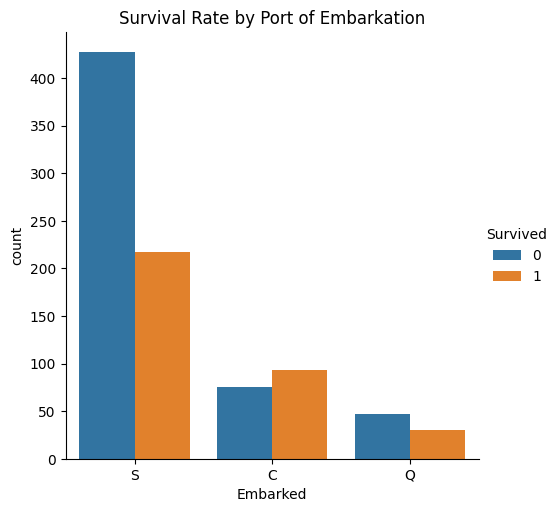

In [9]:
sns.catplot(x="Embarked", hue="Survived", kind="count", data=df)
plt.title("Survival Rate by Port of Embarkation")
plt.show()

### ***Дети и подростки имели более высокие показатели выживаемости***

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


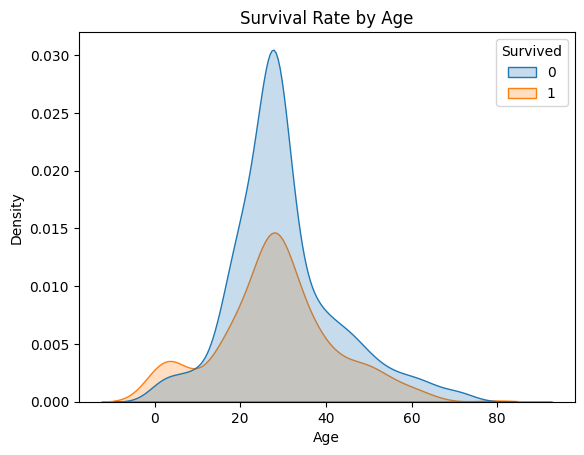

In [10]:
df['Age'] = df['Age'].fillna(df['Age'].median())

sns.kdeplot(data=df, x="Age", hue="Survived", fill=True)
plt.title("Survival Rate by Age")
plt.show()

### ***Пассажиры с меньшим числом членов семьи имели более высокие показатели выживаемости***

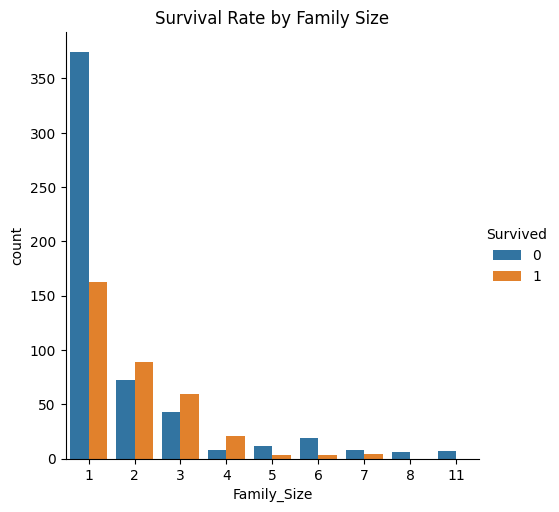

In [11]:
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1

sns.catplot(x="Family_Size", hue="Survived", kind="count", data=df)
plt.title("Survival Rate by Family Size")
plt.show()

### ***Пассажиры, оплатившие более высокие тарифы, имели более высокие показатели выживаемости***

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

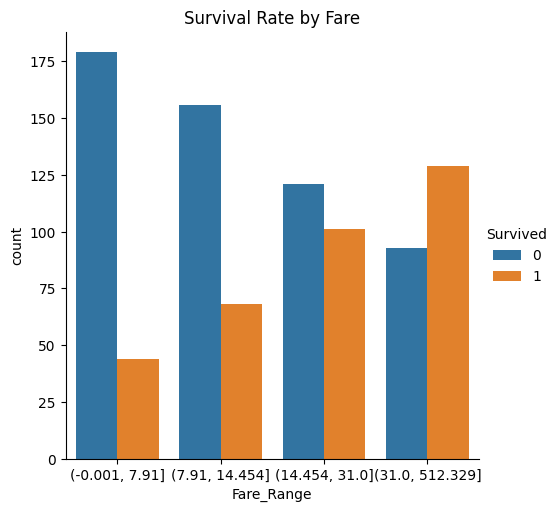

In [12]:
df['Fare_Range'] = pd.qcut(df['Fare'], 4)

sns.catplot(x="Fare_Range", hue="Survived", kind="count", data=df)
plt.title("Survival Rate by Fare")
plt.show()

# Feature Engineering

In [9]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna('S')

In [10]:
df['Family_Size'] = df['SibSp'] + df['Parch'] + 1
df['Is_Alone'] = (df['Family_Size'] == 1).astype(int)

In [11]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

In [12]:
from sklearn.preprocessing import LabelEncoder

le_sex = LabelEncoder()
le_emb = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])
df['Embarked'] = le_emb.fit_transform(df['Embarked'])

In [13]:
df.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family_Size,Is_Alone
0,0,3,1,22.0,1,0,7.2500,2,2,0
1,1,1,0,38.0,1,0,71.2833,0,2,0
2,1,3,0,26.0,0,0,7.9250,2,1,1
3,1,1,0,35.0,1,0,53.1000,2,2,0
4,0,3,1,35.0,0,0,8.0500,2,1,1


# Model Build & Train

In [126]:
X = df.drop(columns=['Survived'], axis=1)
y = df['Survived']

In [49]:
def train_model(model, X_train, y_train, epochs, batch_size):
    return model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2)

In [140]:
def make_model1(input_shape):
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization(momentum=0.97))
    model.add(Dense(32, activation='relu'))
    model.add(BatchNormalization(momentum=0.97))
    model.add(Dense(16, activation='relu'))
    model.add(BatchNormalization(momentum=0.97))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [141]:
def make_model2(input_shape):
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=input_shape))
    model.add(BatchNormalization(momentum=0.97))
    model.add(Dense(16, activation='relu'))
    model.add(BatchNormalization(momentum=0.97))
    model.add(Dense(8, activation='relu'))
    model.add(BatchNormalization(momentum=0.97))
    model.add(Dropout(0.25))
    model.add(Dense(2, activation='softmax'))

    # Compile the model
    model.compile(optimizer=Adam(learning_rate=5e-3), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

In [44]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, BatchNormalization
from keras.optimizers import Adam


# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 6s 137ms/step - accuracy: 0.4580 - loss: 0.8084 - val_accuracy: 0.7972 - val_loss: 0.6436
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7380 - loss: 0.5546 - val_accuracy: 0.8042 - val_loss: 0.5630
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7719 - loss: 0.4986 - val_accuracy: 0.8392 - val_loss: 0.5178
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7838 - loss: 0.4945 - val_accuracy: 0.8322 - val_loss: 0.4752
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8095 - loss: 0.4406 - val_accuracy: 0.8322 - val_loss: 0.4422
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7881 - loss: 0.4602 - val_accuracy: 0.8322 - val_loss: 0.4375
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7961 - loss: 0.4308 - val_accuracy: 0.8322 - val_loss: 0.4362
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8089 - loss: 0.4429 - val_accuracy: 0.8182 -

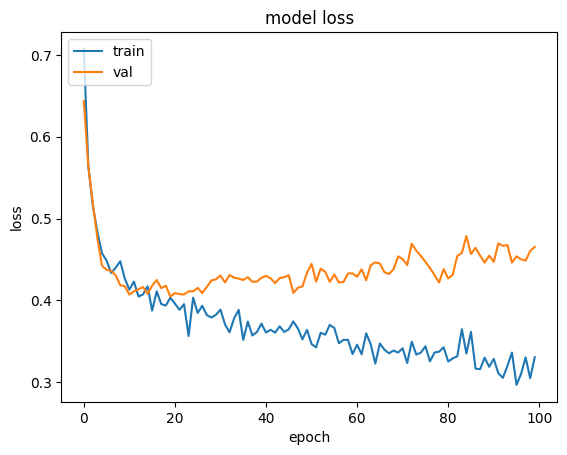

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline
model = make_model1(X_train.shape[1])
history = train_model(model, X_train, y_train, epochs=100, batch_size=32)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 7s 172ms/step - accuracy: 0.6072 - loss: 0.7632 - val_accuracy: 0.6993 - val_loss: 0.5955
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7749 - loss: 0.5135 - val_accuracy: 0.8392 - val_loss: 0.4835
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7697 - loss: 0.5251 - val_accuracy: 0.8182 - val_loss: 0.4559
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8071 - loss: 0.4504 - val_accuracy: 0.8252 - val_loss: 0.4270
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8153 - loss: 0.4539 - val_accuracy: 0.8322 - val_loss: 0.4087
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8098 - loss: 0.4272 - val_accuracy: 0.8392 - val_loss: 0.4038
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7933 - loss: 0.4507 - val_accuracy: 0.8252 - val_loss: 0.4090
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8143 - loss: 0.4787 - val_accuracy: 0.8252 -

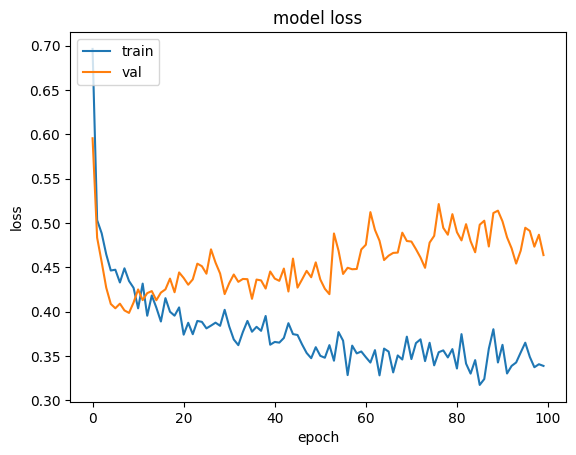

In [56]:
model = make_model2()
history = train_model(model, X_train, y_train, epochs=100, batch_size=32)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Cross-validation 

In [142]:
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
import numpy as np



# def cross_validation(model, X, y, epochs, batch_size):
kf = KFold(n_splits=5, shuffle=True, random_state=42)

target_names = ['Died', 'Survived']

reports = []
confusion_matrices = []
accuracies = []
losses = []
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
for train_index, val_index in kf.split(X):
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    input_dim = X_train_fold.shape[1]

    y_train_fold = to_categorical(y_train_fold)
    y_val_fold = to_categorical(y_val_fold)

    model = make_model1(input_shape=(input_dim,))
    history = model.fit(X_train_fold, y_train_fold, epochs=50, batch_size=32,
              validation_data=(X_val_fold, y_val_fold), verbose=0)

    y_pred_fold = model.predict(X_val_fold)
    y_pred_classes = np.argmax(y_pred_fold, axis=1)
    y_true_classes = np.argmax(y_val_fold, axis=1)

    accuracies.append(history.history['val_accuracy'])
    losses.append(history.history['val_loss'])

    report = classification_report(y_true_classes, y_pred_classes, target_names=target_names)
    confusion = confusion_matrix(y_true_classes, y_pred_classes)

    reports.append(report)
    confusion_matrices.append(confusion)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [143]:
def confusion_matrix(matrix, index):
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted Died', 'Predicted Survived'],
                yticklabels=['Actual Died', 'Actual Survived'])
    plt.xlabel('Predicted Class')
    plt.ylabel('True Class')
    plt.title(f'Confusion matrix for {index+1} fold')
    plt.show()

              precision    recall  f1-score   support

        Died       0.82      0.86      0.84       105
    Survived       0.78      0.73      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.80      0.80      0.80       179



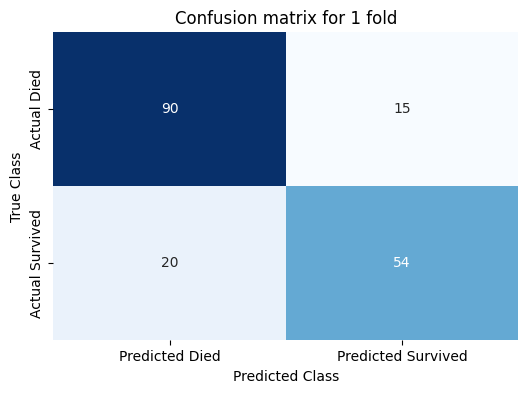

              precision    recall  f1-score   support

        Died       0.80      0.86      0.83       111
    Survived       0.73      0.64      0.68        67

    accuracy                           0.78       178
   macro avg       0.76      0.75      0.75       178
weighted avg       0.77      0.78      0.77       178



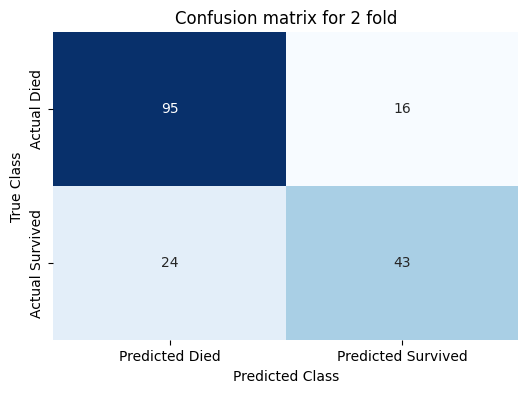

              precision    recall  f1-score   support

        Died       0.84      0.90      0.87       108
    Survived       0.82      0.73      0.77        70

    accuracy                           0.83       178
   macro avg       0.83      0.81      0.82       178
weighted avg       0.83      0.83      0.83       178



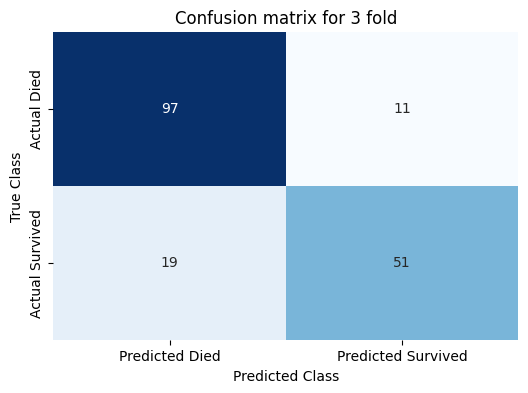

              precision    recall  f1-score   support

        Died       0.77      0.90      0.83       112
    Survived       0.76      0.53      0.62        66

    accuracy                           0.76       178
   macro avg       0.76      0.72      0.73       178
weighted avg       0.76      0.76      0.75       178



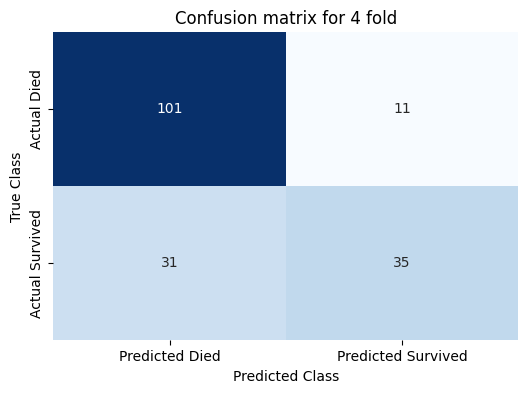

              precision    recall  f1-score   support

        Died       0.81      0.93      0.87       113
    Survived       0.84      0.63      0.72        65

    accuracy                           0.82       178
   macro avg       0.83      0.78      0.79       178
weighted avg       0.82      0.82      0.81       178



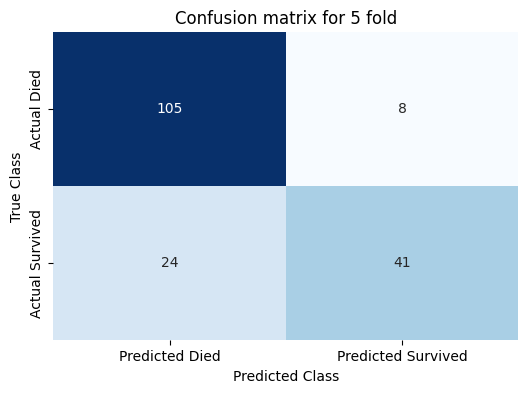

In [144]:
for i in range(5):
    print(reports[i])
    confusion_matrix(confusion_matrices[i], i)

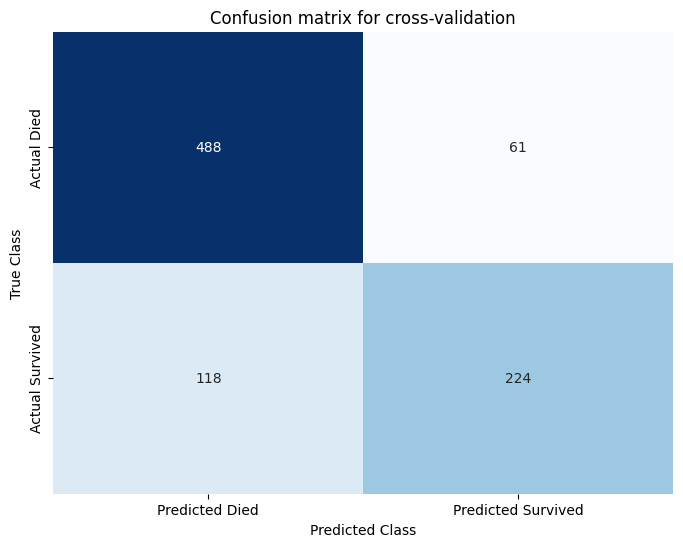

In [153]:
total_confusion_matrix = np.sum(confusion_matrices, axis=0)
plt.figure(figsize=(8, 6))
sns.heatmap(total_confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted Died', 'Predicted Survived'],
                yticklabels=['Actual Died', 'Actual Survived'])
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.title('Confusion matrix for cross-validation')
plt.show()

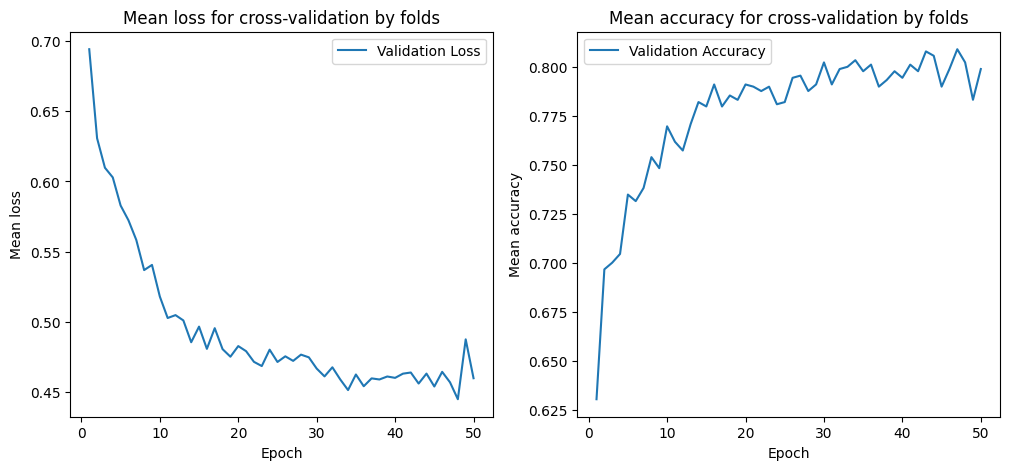

In [159]:
mean_accuracy = np.mean(accuracies, axis=0)
mean_loss = np.mean(losses, axis=0)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, 50 + 1), mean_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean loss')
plt.title('Mean loss for cross-validation by folds')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(range(1, 50 + 1), mean_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Mean accuracy')
plt.title('Mean accuracy for cross-validation by folds')
plt.legend()

plt.show()

## По итогам кросс-валдицации можно сделать вывод, что проблема переобучения модели решена. Однако применение нейронной сети для решения данной задачи не является оптимальным решением, поскольку у нас очень маленький набор данных для использования нейронной сети и подход с применением классических ML моделей может показать себя лучше в решении данной задачи.